### Importing Libraries

In [1]:
#importing necessary libraries

#Data Manipulation
import numpy as np
import pandas as pd
import re
import string

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#Machine learning libraries for training model and performance metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Loading Dataset

In [3]:
import csv
import random

dataset = []

# Open the CSV file using the 'ISO-8859-1' encoding
with open('/content/Sentiment_Analysis_1.6.csv', 'r', encoding='ISO-8859-1') as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)  # Read and store the headers
    for row in csv_reader:
        if len(row) > 1:
            dataset.append(row)

# Shuffle the data randomly
random.shuffle(dataset)

# Calculate the number of rows for a 50% sample
sample_size = int(0.5 * len(dataset))

# Create a DataFrame from the random sample and headers
data = pd.DataFrame(dataset[:sample_size], columns=headers)


In [4]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,4,1759814403,Sun May 10 20:01:29 PDT 2009,NO_QUERY,WassoufBook,&quot;Allah Kareem&quot; 2009 Album is OUT!!! ...
1,4,1967060734,Fri May 29 18:54:10 PDT 2009,NO_QUERY,DjLoopzRGV,just got home.. gettin ready for downtown..
2,0,2063701772,Sun Jun 07 03:44:19 PDT 2009,NO_QUERY,r_cousins,hates romeo and juliet. if someone actually me...
3,0,2267135244,Sun Jun 21 09:40:57 PDT 2009,NO_QUERY,JodyJackson88,Bye kitty Lounging in bed alone now. Gonna w...
4,0,2069596905,Sun Jun 07 16:10:11 PDT 2009,NO_QUERY,Carolcastilho,@dougiemcfly why the pink bass is being ground...


In [5]:
x=['target','ids','date','flag','user','text']

In [6]:
#changing the column names
data.columns=x

In [7]:
data.head(10)

,target,ids,date,flag,user,text
0,4,1759814403,Sun May 10 20:01:29 PDT 2009,NO_QUERY,WassoufBook,&quot;Allah Kareem&quot; 2009 Album is OUT!!! ...
1,4,1967060734,Fri May 29 18:54:10 PDT 2009,NO_QUERY,DjLoopzRGV,just got home.. gettin ready for downtown..
2,0,2063701772,Sun Jun 07 03:44:19 PDT 2009,NO_QUERY,r_cousins,hates romeo and juliet. if someone actually me...
3,0,2267135244,Sun Jun 21 09:40:57 PDT 2009,NO_QUERY,JodyJackson88,Bye kitty Lounging in bed alone now. Gonna w...
4,0,2069596905,Sun Jun 07 16:10:11 PDT 2009,NO_QUERY,Carolcastilho,@dougiemcfly why the pink bass is being ground...
5,4,1771234114,Mon May 11 23:38:37 PDT 2009,NO_QUERY,evelynvt,im going to bed with my Hunnie
6,0,1551073988,Sat Apr 18 08:04:37 PDT 2009,NO_QUERY,ianhf,@willcarling Have Gloucester actually turned u...
7,0,1993877773,Mon Jun 01 11:04:11 PDT 2009,NO_QUERY,chloecee,been out in the garden. cant believe had schoo...
8,4,1989534148,Mon Jun 01 01:54:10 PDT 2009,NO_QUERY,beading,@mimpimurni nice bf~!!! He must be a caring pe...
9,0,1883659559,Fri May 22 08:54:22 PDT 2009,NO_QUERY,Dannydagger,Barf chronicles: i'm pretty sure i'm sick


In [ ]:
data.tail()

,target,ids,date,flag,user,text
799994,0,2002148042,Tue Jun 02 03:18:09 PDT 2009,NO_QUERY,whatswhat_sian,@padmali At least they are doing something. Ho...
799995,4,1548556487,Fri Apr 17 21:17:08 PDT 2009,NO_QUERY,leahscious,This is cool....it looks good...still not sure...
799996,4,2016088863,Wed Jun 03 06:08:41 PDT 2009,NO_QUERY,mobri488,yay its been a great morning already. feeling ...
799997,4,1956834778,Thu May 28 22:48:39 PDT 2009,NO_QUERY,Ps8612,@slicKGilchrist oh ok. just checkimg! Jon &amp...
799998,0,2249907276,Fri Jun 19 23:16:09 PDT 2009,NO_QUERY,NessTea,"@Vujachick nope, it was Kobe, Fish, Pau, Trev,..."


In [8]:
data['target'].value_counts()

4    400331
0    399668
Name: target, dtype: int64

In [9]:
data.shape

(799999, 6)

The number of columns in the dataset is 6 and number of records are 593428.But as we have took the random 50% of the data, it will show 50% records.

In [10]:
data.dtypes

target    object
ids       object
date      object
flag      object
user      object
text      object
dtype: object

Here, we can observe that the target column, ids column and date column types are object. we have to change them to integer and date.

###Converting the Data type

In [11]:
data['target'] = data['target'].astype(int)
data['ids'] = data['ids'].astype(int)
data['date'] = pd.to_datetime(data['date'],errors='coerce')

data.dtypes

target             int64
ids                int64
date      datetime64[ns]
flag              object
user              object
text              object
dtype: object

In [12]:
# Assuming data is your DataFrame with the 'date' column converted to datetime
invalid_date = data['date'].isnull()

# Filter out rows with invalid dates
df = data[~invalid_date]

# Display the DataFrame without invalid dates
print(df)

        target         ids                date      flag            user  \
0            4  1759814403 2009-05-10 20:01:29  NO_QUERY     WassoufBook   
1            4  1967060734 2009-05-29 18:54:10  NO_QUERY      DjLoopzRGV   
2            0  2063701772 2009-06-07 03:44:19  NO_QUERY       r_cousins   
3            0  2267135244 2009-06-21 09:40:57  NO_QUERY   JodyJackson88   
4            0  2069596905 2009-06-07 16:10:11  NO_QUERY   Carolcastilho   
...        ...         ...                 ...       ...             ...   
799994       4  1989276106 2009-06-01 00:57:51  NO_QUERY       sotodance   
799995       0  1966509619 2009-05-29 17:53:57  NO_QUERY         Missi__   
799996       0  1694742200 2009-05-04 03:57:00  NO_QUERY   twiinkle_toes   
799997       4  2187112319 2009-06-15 19:48:28  NO_QUERY     kungfukitty   
799998       4  1754791403 2009-05-10 07:23:50  NO_QUERY  brittanyjeanne   

                                                     text  
0       &quot;Allah Kareem&

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799999 entries, 0 to 799998
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   target  799999 non-null  int64         
 1   ids     799999 non-null  int64         
 2   date    799999 non-null  datetime64[ns]
 3   flag    799999 non-null  object        
 4   user    799999 non-null  object        
 5   text    799999 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 42.7+ MB


In [14]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df['flag'].value_counts()

NO_QUERY    799999
Name: flag, dtype: int64

In [17]:
df['target'].nunique()

2

In [18]:
df['target'].value_counts()

4    400331
0    399668
Name: target, dtype: int64

In [19]:
df['target'] = df['target'].replace(4,1)
df['target'].value_counts()

1    400331
0    399668
Name: target, dtype: int64

###Dropping Redundant columns

In [20]:
#dropping the unncessary columns
df= df.drop(["ids","date","flag","user"],axis=1)

In [21]:
#let us check the first 5 data of the columnn 'text'
print(df['text'].iloc[0],"\n")
print(df['text'].iloc[1],"\n")
print(df['text'].iloc[2],"\n")
print(df['text'].iloc[3],"\n")
print(df['text'].iloc[4],"\n")

&quot;Allah Kareem&quot; 2009 Album is OUT!!! RUN to the stores and BUY your copy NOW!! Album is also available too at WassoufBook.com Congrats ALL  

just got home.. gettin ready for downtown..  

hates romeo and juliet. if someone actually mentions shakespeare again after this - i just might have to massacre them. Shame.  

Bye kitty   Lounging in bed alone now. Gonna watch old episodes of SYTYCD 

@dougiemcfly why the pink bass is being grounded for NOT WORKING?!  



Here we can observe that the text contains lot of inconsistent data. we need to remove the inconsistent data.

In [22]:
# Check data types and values in the 'text' column
print(df['text'].apply(type))


0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3         <class 'str'>
4         <class 'str'>
              ...      
799994    <class 'str'>
799995    <class 'str'>
799996    <class 'str'>
799997    <class 'str'>
799998    <class 'str'>
Name: text, Length: 799999, dtype: object


In [23]:
print(df['text'].unique())

['&quot;Allah Kareem&quot; 2009 Album is OUT!!! RUN to the stores and BUY your copy NOW!! Album is also available too at WassoufBook.com Congrats ALL '
 'just got home.. gettin ready for downtown.. '
 'hates romeo and juliet. if someone actually mentions shakespeare again after this - i just might have to massacre them. Shame. '
 ... 'Throbbing headache and in desperate need of seeing my baby!  Meh.'
 "@pinksugarpeep awesome!! see? they're very delicious. i'm trying to save one for tomorrow, but they're quickly disappearing here. "
 "don't forget to wish your mommies a &quot;Happy Mother's Day&quot; "]


### Data Preprocessing

-- Changing the case
-- Removing inconsistent data
-- Tokenization
-- Removing stopwords
-- Text Normalization(Stemming and Lemmatization)

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

The Punkt tokenizer is designed to perform sentence tokenization, which means it divides a text document into individual sentences. It's named after the German word "punkt," which means "point" or "period." Sentence tokenization is the process of identifying the boundaries of sentences in a text.

####Converting to lower case

In [25]:
# Converting to Lower case

df['text']=df['text'].str.lower()
df['text'].head()

0    &quot;allah kareem&quot; 2009 album is out!!! ...
1         just got home.. gettin ready for downtown.. 
2    hates romeo and juliet. if someone actually me...
3    bye kitty   lounging in bed alone now. gonna w...
4    @dougiemcfly why the pink bass is being ground...
Name: text, dtype: object

Removing URLS

In [26]:
import re

def cleaning_URLs(data):
  # Check if the input is a string
    if isinstance(data, str):
        return re.sub('((www.[^s]+)|(https?://[^s]+))', ' ', data)
    else:
        return data  # Return the data unchanged if it's not a string
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].head()

0    &quot;allah kareem&quot; 2009 album is out!!! ...
1         just got home.. gettin ready for downtown.. 
2    hates romeo and juliet. if someone actually me...
3    bye kitty   lounging in bed alone now. gonna w...
4    @dougiemcfly why the pink bass is being ground...
Name: text, dtype: object

Remove Non-Alphanumeric character

In [27]:
def non_alphanumeric(text):
    return re.sub(r'[^\w\s]', '', text)
df['text']=df['text'].apply(lambda x: non_alphanumeric(x))
df['text'].head()

0    quotallah kareemquot 2009 album is out run to ...
1             just got home gettin ready for downtown 
2    hates romeo and juliet if someone actually men...
3    bye kitty   lounging in bed alone now gonna wa...
4    dougiemcfly why the pink bass is being grounde...
Name: text, dtype: object

Remove @, # from the Data

In [28]:
def ref(text):
    return re.sub(r'\@\w+|\#', '', text)
df['text'] = df['text'].apply(lambda x:ref(x))
df['text'].head()

0    quotallah kareemquot 2009 album is out run to ...
1             just got home gettin ready for downtown 
2    hates romeo and juliet if someone actually men...
3    bye kitty   lounging in bed alone now gonna wa...
4    dougiemcfly why the pink bass is being grounde...
Name: text, dtype: object

Remove special characters,numbers and punctuations

In [29]:
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
df['text'].head()

0    quotallah kareemquot      album is out run to ...
1             just got home gettin ready for downtown 
2    hates romeo and juliet if someone actually men...
3    bye kitty   lounging in bed alone now gonna wa...
4    dougiemcfly why the pink bass is being grounde...
Name: text, dtype: object

Remove extra whitespaces

In [30]:
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)
df['text'].head()

0    quotallah kareemquot album is out run to the s...
1             just got home gettin ready for downtown 
2    hates romeo and juliet if someone actually men...
3    bye kitty lounging in bed alone now gonna watc...
4    dougiemcfly why the pink bass is being grounde...
Name: text, dtype: object

Remove Short Words

In [31]:
df['text'] = df['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,target,text
0,1,quotallah kareemquot album stores your copy al...
1,1,just home gettin ready downtown
2,0,hates romeo juliet someone actually mentions s...
3,0,kitty lounging alone gonna watch episodes sytycd
4,0,dougiemcfly pink bass being grounded working


##Stemming

 Stemming
  It involves reducing words to their root or base form, known as the "stem."
  The goal of stemming is to transform related words into a common form
  to simplify text analysis and improve information retrieval.
  Example like "running," "runs," and "ran" to their common root form, "run."

  PorterStemmer() is used to perform stemming on a list of words.

In [32]:
ps=PorterStemmer()

def stemming(data):
    stemmed_word = [ps.stem(w) for w in data.split()]
    stemmed_text = ' '.join(stemmed_word)
    return stemmed_text

In [33]:
df['text'] = df['text'].apply(lambda x:stemming(x))

##Tokenization

In [34]:
# Tokenizing the text
#from nltk.tokenize import RegexpTokenizer
#tokenizer = RegexpTokenizer(r'\w+')
#df['text'] = df['text'].apply(tokenizer.tokenize)
#df['text'].head()

In [35]:
df.head(10)

,target,text
0,1,quotallah kareemquot album store your copi alb...
1,1,just home gettin readi downtown
2,0,hate romeo juliet someon actual mention shakes...
3,0,kitti loung alon gonna watch episod sytycd
4,0,dougiemcfli pink bass be ground work
5,1,go with hunni
6,0,willcarl have gloucest actual turn thi team
7,0,been garden cant believ school thi gorgeou wea...
8,1,mimpimurni nice must care person
9,0,barf chronicl pretti sure sick


In [36]:
df['target'].value_counts()

1    400331
0    399668
Name: target, dtype: int64

In [37]:
#let us check the first 5 data of the columnn 'text'
print(df['text'].iloc[0],"\n")
print(df['text'].iloc[1],"\n")
print(df['text'].iloc[2],"\n")
print(df['text'].iloc[3],"\n")
print(df['text'].iloc[4],"\n")

quotallah kareemquot album store your copi album also avail wassoufbookcom congrat 

just home gettin readi downtown 

hate romeo juliet someon actual mention shakespear again after thi just might have massacr them shame 

kitti loung alon gonna watch episod sytycd 

dougiemcfli pink bass be ground work 



In [38]:
df.shape

(799999, 2)

###Removal of Stopwords

In [39]:
import os
import nltk.data
nltk.data.find('corpora/stopwords')
#nltk.data.path.append('/content')
nltk.data.path.append('/content/to/nltk_data')

In [40]:
import nltk
nltk.download('stopwords', download_dir='/path/to/nltk_data')

[nltk_data] Downloading package stopwords to /path/to/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
stop=stopwords.words('english')
stop_words=['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
stop.extend(stop_words)

In [42]:
df['text']=df['text'].apply(lambda x:" ".join([word for word in x.split() if word not in stop]))
df.text.head()

0    quotallah kareemquot album store copi album al...
1                           home gettin readi downtown
2    hate romeo juliet someon actual mention shakes...
3           kitti loung alon gonna watch episod sytycd
4                    dougiemcfli pink bass ground work
Name: text, dtype: object

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799999 entries, 0 to 799998
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  799999 non-null  int64 
 1   text    799999 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.3+ MB


##Polarity and Subjectivity
Polarity means how positive or negative the text is the value of polarity lies between -1 to 1
negative value indicates that the sentiment is not good
positive value indicates that the sentiment is good

Subjectivity means statement or opinion or piece of text influenced by personal feelings
The value of subjectivity relates to whether it is a public opinion or its factual information
the value of subjectivity lies between 0 to 1.


In [44]:
from textblob import TextBlob
from textblob import Word

In [45]:
df['text'] = df['text'].astype(str)
polarity_score = []

for i in range(0, df.shape[0]):
    score = TextBlob(df.iloc[i]['text'])
    sent_score = score.sentiment.polarity
    polarity_score.append(sent_score)
#return polarity_score

In [46]:
df=pd.concat([df,pd.Series(polarity_score)],axis=1)

In [47]:
df.head()

,target,text,0
0,1,quotallah kareemquot album store copi album al...,0.000
1,1,home gettin readi downtown,0.000
2,0,hate romeo juliet someon actual mention shakes...,-0.400
3,0,kitti loung alon gonna watch episod sytycd,0.000
4,0,dougiemcfli pink bass ground work,-0.125


In [48]:
df.rename(columns={df.columns[2]:"Polarity"},inplace=True)

In [49]:
df.head()

,target,text,Polarity
0,1,quotallah kareemquot album store copi album al...,0.000
1,1,home gettin readi downtown,0.000
2,0,hate romeo juliet someon actual mention shakes...,-0.400
3,0,kitti loung alon gonna watch episod sytycd,0.000
4,0,dougiemcfli pink bass ground work,-0.125


In [50]:
df['target'] = df['target'].apply(lambda x: 'negative' if x == 0 else 'positive' if x == 1 else x)

In [51]:
df['target'].value_counts()

positive    400331
negative    399668
Name: target, dtype: int64

In [52]:
def sentiment(label):
    if label<0:
      return "negative"
    else:
      return "positive"


In [53]:
df['Sentiment']=df['Polarity'].apply(sentiment)

In [54]:
df.head()

,target,text,Polarity,Sentiment
0,positive,quotallah kareemquot album store copi album al...,0.000,positive
1,positive,home gettin readi downtown,0.000,positive
2,negative,hate romeo juliet someon actual mention shakes...,-0.400,negative
3,negative,kitti loung alon gonna watch episod sytycd,0.000,positive
4,negative,dougiemcfli pink bass ground work,-0.125,negative


##EDA

<Axes: xlabel='Sentiment', ylabel='count'>

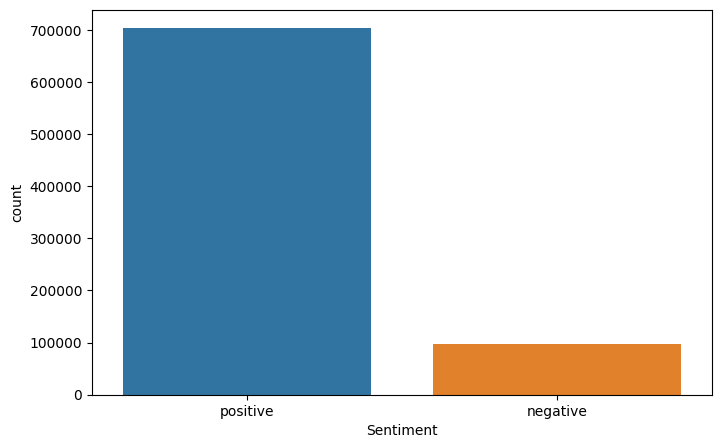

In [55]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment',data=df)

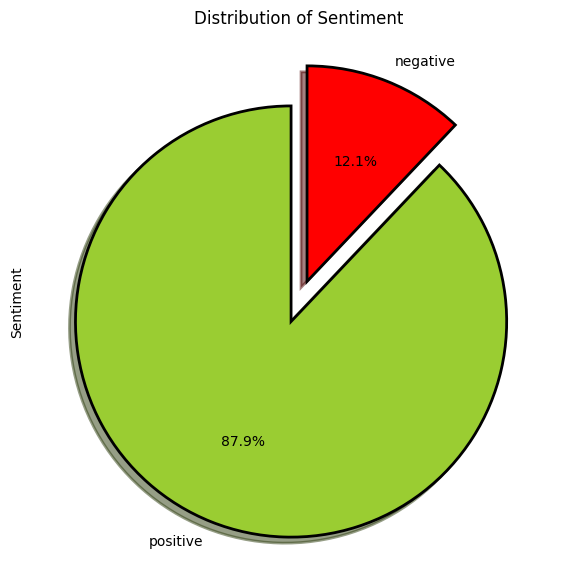

In [56]:
#Distribution plot of Sentiment
tags = df['Sentiment'].value_counts()
explode = (0.1, 0.1)
colors = ("yellowgreen", "red")
wp = {"linewidth": 2, "edgecolor": "black"}

fig = plt.figure(figsize=(7,7))
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
          startangle=90, wedgeprops=wp, explode=explode, labels=['positive', 'negative'])
plt.title("Distribution of Sentiment")
plt.show()

In [57]:
positive_tweet = df[df['Sentiment'] == 'positive']
positive_tweet = positive_tweet.sort_values(['Polarity'],ascending=False)
positive_tweet.head()

,target,text,Polarity,Sentiment
119825,positive,namthip best paint macaron color vodka suffici...,1.0,positive
398476,positive,martagf well doe releas finit scope effort bes...,1.0,positive
45330,negative,best weather howev meat readi wouldnt want spo...,1.0,positive
228113,positive,justmichth perfect,1.0,positive
518428,positive,mynameislogang best dont sleep ever cali,1.0,positive


In [58]:
!pip install wordcloud

In [60]:
from wordcloud import WordCloud

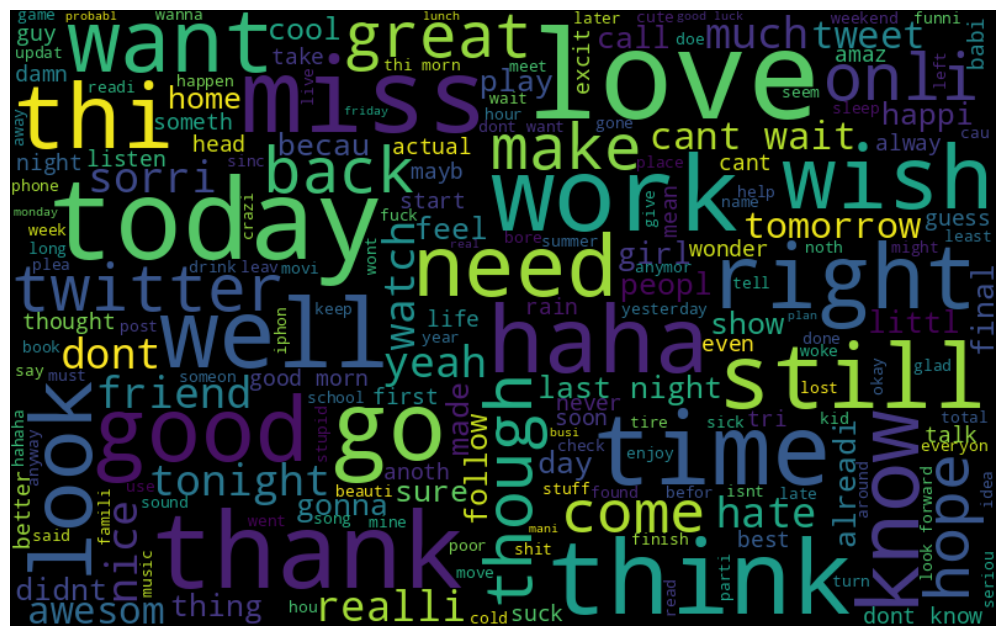

In [61]:
# visualize the frequent words

all_words = " ".join([sentence for sentence in df['text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
# Drop rows with NaN values in the 'Text' column
positive_tweet = positive_tweet.dropna(subset=['text'])

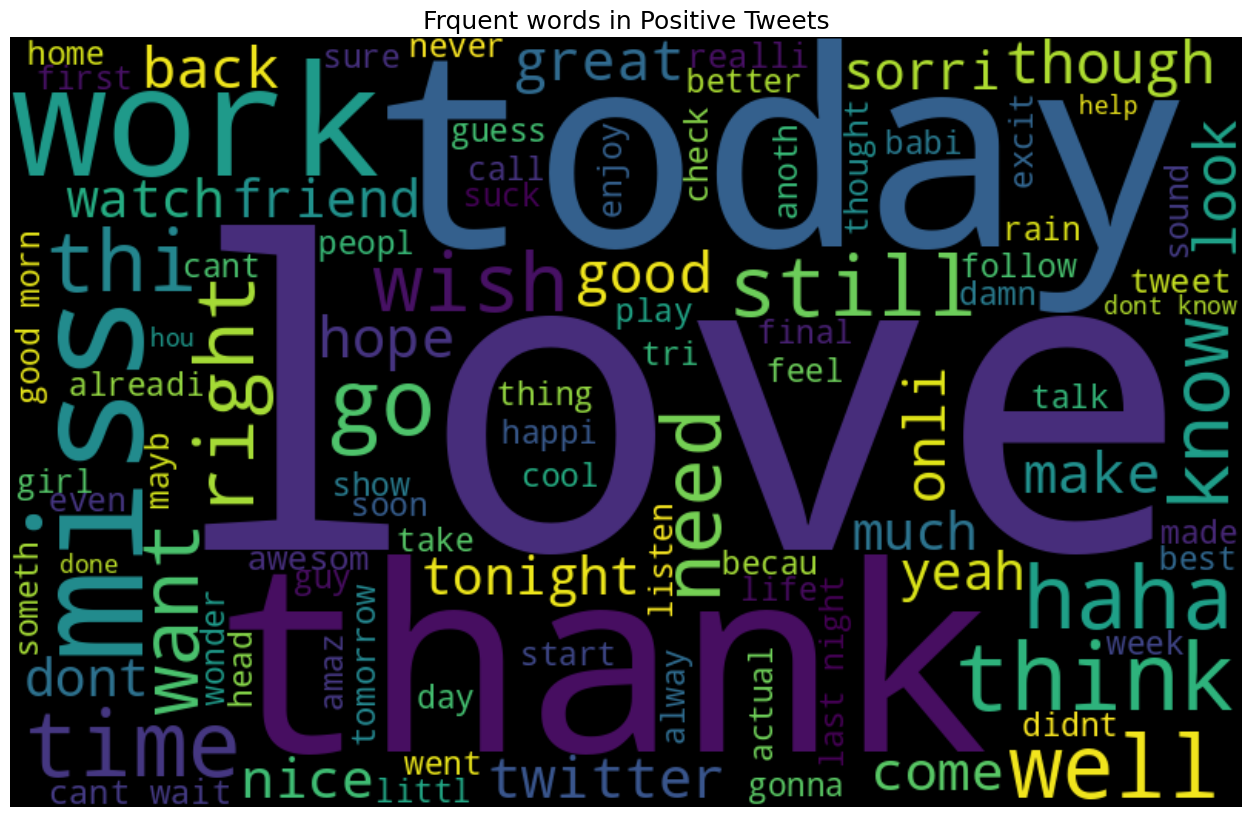

In [63]:
text = ' '.join([str(word) for word in positive_tweet['text']])
plt.figure(figsize=(20,10),facecolor='None')
wordcloud = WordCloud(max_words=100,width=800,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("Frquent words in Positive Tweets",fontsize=18)
plt.show()


In [64]:
negative_tweet = df[df['Sentiment'] == 'negative']
negative_tweet = negative_tweet.sort_values(['Polarity'],ascending=False)
negative_tweet.head()

,target,text,Polarity,Sentiment
468062,negative,shit rememb thi boss fight first playthrough t...,-4.625929e-18,negative
244640,negative,sorri late updat last week blue team advanc fi...,-6.938894e-18,negative
566696,negative,buzzedit limit thing weird honest feel repli f...,-9.251859e-18,negative
255980,negative,ughh phone difficult right follow certain,-9.251859e-18,negative
196869,positive,look crap winter skin static hair eye cold goo...,-1.110223e-17,negative


In [65]:
negative_tweet = negative_tweet.dropna(subset=['text'])

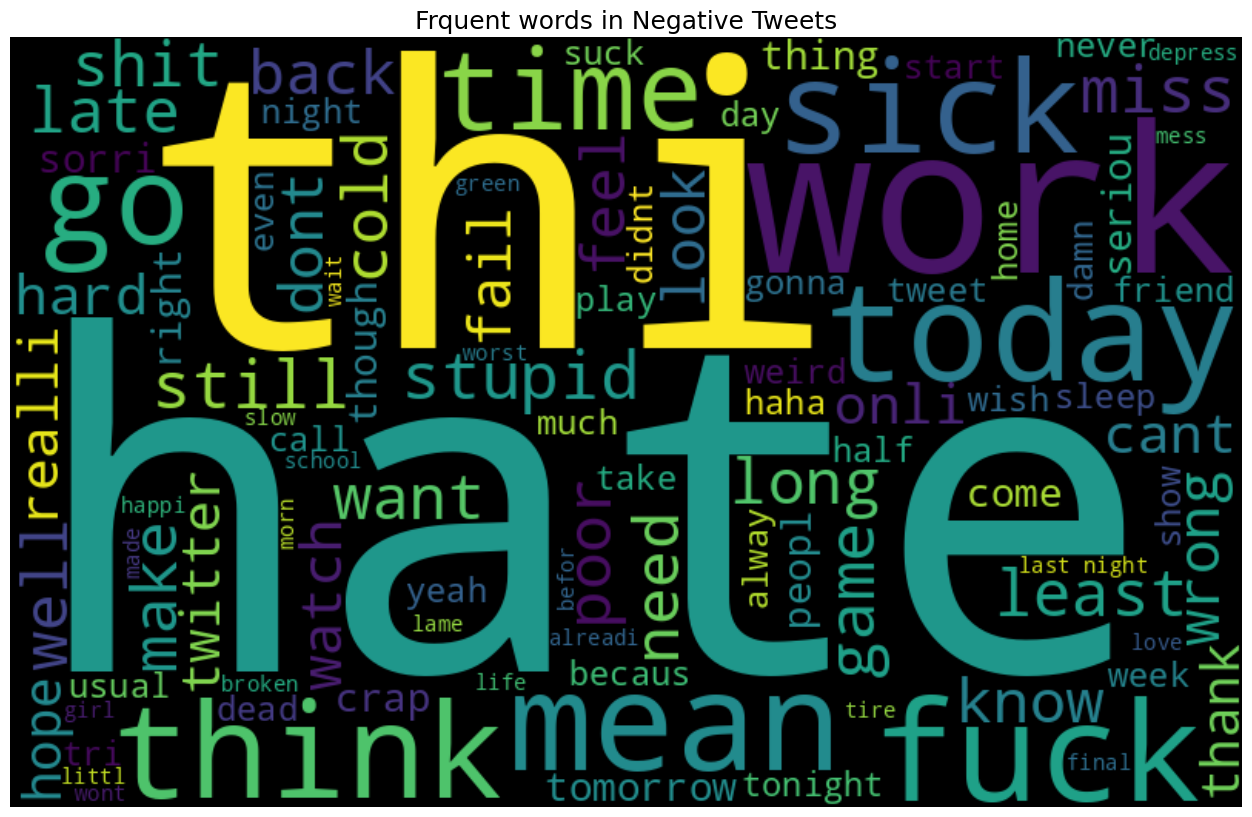

In [66]:
text = ' '.join([str(word) for word in negative_tweet['text']])
plt.figure(figsize=(20,10),facecolor='None')
wordcloud = WordCloud(max_words=100,width=800,height=500).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title("Frquent words in Negative Tweets",fontsize=18)
plt.show()

### Vectorization of Tokens

Vectorization is the process of converting tokens to numbers.It is very important,because the machine learning models do not work with textual data they work with numbers.

TfIdfvectorizer:
The TfidfVectorizer is used to convert a collection of text documents into a TF-IDF matrix, where each row represents a document, and each column represents a unique word (feature). The values in the matrix represent the TF-IDF weights of each word in each document.

Term Frequency (TF):  calculates the frequency of each word (term) in a document
Inverse Document Frequency (IDF): It measures how unique or rare a term is across all the documents in the corpus.



In [67]:
vect = TfidfVectorizer(ngram_range=(1,2),sublinear_tf=True).fit(df['text'])

In [68]:
feature_names = vect.get_feature_names_out()
print("Number of features:{}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features:2564116

First 20 features:
 ['aaaa' 'aaaa aaaaaaaa' 'aaaa alreadi' 'aaaa balll' 'aaaa best'
 'aaaa cannot' 'aaaa cutee' 'aaaa doooo' 'aaaa gone' 'aaaa gonna'
 'aaaa gotta' 'aaaa hahaha' 'aaaa hate' 'aaaa internship' 'aaaa jakarta'
 'aaaa like' 'aaaa logo' 'aaaa onli' 'aaaa pada' 'aaaa said']


In [69]:
X = df['text']
y = df['Sentiment']
X = vect.fit_transform(X)

##Data Splitting

In [70]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [71]:
#to save the cleaned data for visualization purpose
cleaned_data=df
#cleaned_data
cleaned_data.to_csv('cleaned_data.csv', index=False)

In [72]:
from google.colab import files

# Download a specific file
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,r2_score

In [74]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [75]:
#Size of all
print("size of X_train:",(X_train.shape))
print("size of y_train:",(y_train_encoded.shape))
print("size of X_test:",(X_test.shape))
print("size of y_test:",(y_test_encoded.shape))

size of X_train: (639999, 2564116)
size of y_train: (639999,)
size of X_test: (160000, 2564116)
size of y_test: (160000,)


In [76]:
y_test_encoded = y_test_encoded.astype(int)

##Logistic Regression

In [77]:
lr = LogisticRegression()
lr.fit(X_train,y_train_encoded)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(lr_pred,y_test_encoded)
lr_r2 = r2_score(lr_pred,y_test_encoded)
print("Test accuracy: {:.2f}%".format(lr_acc*100))
print("R2 Score: {:.2f}%".format(lr_r2*100))

Test accuracy: 97.80%
R2 Score: 77.05%


In [78]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_encoded,lr_pred))
print("\n")

[[ 16567   2935]
 [   579 139919]]




##Navie Bayes Classifier

In [79]:
# Create and train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train_encoded)
nb_pred = nb.predict(X_test)
# Calculate accuracy and R-squared
nb_acc = accuracy_score(nb_pred, y_test_encoded)
nb_r2 = r2_score(nb_pred, y_test_encoded)
print("Naive Bayes Test Accuracy: {:.2f}%".format(nb_acc * 100))
print("Naive Bayes R2 Score: {:.2f}%".format(nb_r2 * 100))

Naive Bayes Test Accuracy: 88.27%
Naive Bayes R2 Score: -2469.01%


In [80]:
nb_confusion_matrix = confusion_matrix(y_test_encoded, nb_pred)
print("Confusion Matrix (Naive Bayes):")
print(nb_confusion_matrix)

Confusion Matrix (Naive Bayes):
[[   733  18769]
 [     1 140497]]


##Random Forest Classifier

In [ ]:
# Create and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=30,random_state=42)
rf.fit(X_train, y_train_encoded)
rf_pred = rf.predict(X_test)
# Calculate accuracy and R-squared
rf_acc = accuracy_score(rf_pred, y_test_encoded)
rf_r2 = r2_score(rf_pred, y_test_encoded)

print("Random Forest Test Accuracy: {:.2f}%".format(rf_acc * 100))
print("Random Forest R2 Score: {:.2f}%".format(rf_r2 * 100))

In [ ]:
rf_confusion_matrix = confusion_matrix(y_test_encoded, rf_pred)
print("Confusion Matrix (Random Forest):")
print(rf_confusion_matrix)

##Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

# Create and train the SVM classifier
svm = SVC(kernel='linear', C=1.0)

svm.fit(X_train, y_train_encoded)
svm_pred = svm.predict(X_test)

# Calculate accuracy and R-squared
svm_acc = accuracy_score(svm_pred, y_test_encoded)
svm_r2 = r2_score(svm_pred, y_test_encoded)

print("SVM Test Accuracy: {:.2f}%".format(svm_acc * 100))
print("SVM R2 Score: {:.2f}%".format(svm_r2 * 100))


In [ ]:
svm_confusion_matrix = confusion_matrix(y_test_encoded, svm_pred)
print("Confusion Matrix (SVM):")
print(svm_confusion_matrix)

In [ ]:
from sklearn.model_selection import cross_val_score
# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())
]

#Best Fit Model

In [ ]:
#Best model
for name, model in models:
    scores = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy = {scores.mean()}, Std Dev = {scores.std()}')

# Choose the model with the highest mean accuracy
best_model = max(models, key=lambda x: cross_val_score(x[1], X_train, y_train_encoded, cv=5, scoring='accuracy').mean())

print(f'Best Model: {best_model[0]}')

#Feature Importance

In [ ]:
# Get feature importances
#We are choosing svm as the best model, since it showed good accuracy
importances = svm.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Assuming X is a DataFrame

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()